# Численные методы решения обыкновенных дифференциальных уравнений и систем

In [1]:
#Подготовка - подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3
from IPython.display import Image
%config InlineBackend.figure_formats = ['svg']  #установить векторный формат для графиков

Пусть требуется решить обыкновенное дифференциальное уравнение (ordinary differential equation, ODE) I порядка:
$$ \frac{d}{dt}y = y$$ 
при начальном условии: 
$$y(0)=1$$

Такая задача называется _начальной_, или _задачей Коши_.

##Аналитическое решение

Данное уравнение легко можно решить методом разделения переменных:
$$\frac{d}{dt} y = y \Rightarrow \frac{dy}{y} = dt $$

Левую и правую часть необходимо проинтегрировать:

$$\int \frac{1}{y} \, \mathrm{d}y = \ln y + С_1$$

$$\int \mathrm{d}t = t + С_2$$ 

В результате получим алгебраическое уравнение:

$$\ln y = t + C \Rightarrow y = e^{t + C} \Rightarrow y = e^C e^t \Rightarrow y = ce^t$$


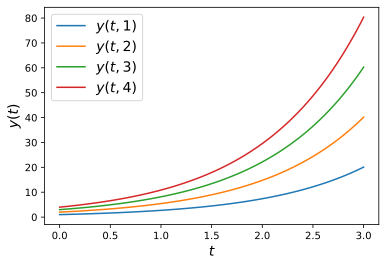

In [2]:
def y(t, c):
    return c * np.exp(t)

t = np.linspace(0, 3, 100)

for c in range(1, 5):
    plt.plot(t, y(t,c), label='$ y(t, %s) $' %c)

plt.legend(loc='upper left', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14);



Формула: $$y = ce^t $$  - задает семейство экспоненциальных кривых. Поэтому для однозначного нахождения нужной функции требуется задать начальное условие - значение $y(0)$.

В данном примере начальное условие: $$ y(0) = 1 $$
Следовательно, $$ ce^0 = 1 \Rightarrow c = 1 $$

Точное аналитическое решения уравнения - функция: $$y_{ex}(t) = e^t. $$

In [3]:
def y_exact(t):
    return np.exp(t)

## Численное решение методом Эйлера

Метод Эйлера позволяет вычислить приближенное значение функции, заданной своей производной и начальным значением. В методе Эйлера эта функция заменяется ломаной линией, построенной из касательных к графику функции в точках $A_i$. Расстояние между этими точками определяется шагом $h$ по независимой переменной, который должен быть достаточно малым.

Положение каждой последующей точки $A_{i+1}$ вычисляется по уравнению касательной к графику функции в точке $A_i$: $$A_{i+1} = A_i + h y'(t_i).$$

Начальное значение функции - $A_0$ нам известно (это начальное условие).
![Euler method](http://upload.wikimedia.org/wikipedia/commons/1/10/Euler_method.svg)

Исходное дифференциальное уравнение можно представить в общем виде как $$y'(t) = f(t,y),$$ где $f(t,y)$ - функция, по которой вычисляется правая часть уравнения.

В данном примере $y' = f(t,y) = y$, поэтому рекуррентная формула для метода Эйлера преобразуется к виду: $$y_{i+1} = y_i + hy_i.$$

Решение вычиляется в узлах сетки с шагом $h$ по переменной $t$. Параметры метода - число шагов $N$ и верхний предел интегрирования $t_k$. Число шагов $N$ и ширина интервала интегрирования $[0, t_k]$ влияют на размер шага $h$ и точность решения. Метод Эйлера имеет первый порядок, т.е. величина погрешности интегрирования имеет порядок $O(h)$.

In [4]:
y0 = 1 #начальное условие
N = 100 #число шагов
tk = 2 #конец интервала интегрирования
h = tk/N #размер шага
print('Шаг h = %s' %h)

Шаг h = 0.02


In [5]:
# Метод Эйлера
y_euler = np.zeros(N+1) #N интервалов соответствуют N+1 границе
y_euler[0] = y0

for i in range(N):
    y_euler[i+1] = y_euler[i] + h * y_euler[i]    

print(y_euler)

[1.    1.02  1.04  1.061 1.082 1.104 1.126 1.149 1.172 1.195 1.219 1.243
 1.268 1.294 1.319 1.346 1.373 1.4   1.428 1.457 1.486 1.516 1.546 1.577
 1.608 1.641 1.673 1.707 1.741 1.776 1.811 1.848 1.885 1.922 1.961 2.
 2.04  2.081 2.122 2.165 2.208 2.252 2.297 2.343 2.39  2.438 2.487 2.536
 2.587 2.639 2.692 2.745 2.8   2.856 2.913 2.972 3.031 3.092 3.154 3.217
 3.281 3.347 3.414 3.482 3.551 3.623 3.695 3.769 3.844 3.921 4.    4.08
 4.161 4.244 4.329 4.416 4.504 4.594 4.686 4.78  4.875 4.973 5.072 5.174
 5.277 5.383 5.491 5.6   5.712 5.827 5.943 6.062 6.183 6.307 6.433 6.562
 6.693 6.827 6.963 7.103 7.245]


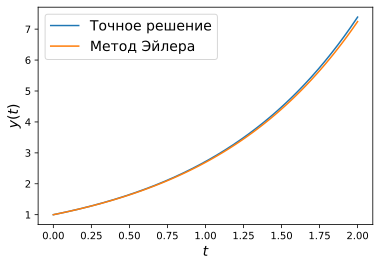

In [6]:
# Графическое сравнение результатов
tnew = np.linspace(0, tk, 1000)
t = np.linspace(0, tk, N+1)

plt.plot(tnew, y_exact(tnew), label='Точное решение')
plt.plot(t, y_euler, label='Метод Эйлера')

plt.legend(loc='upper left', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14);


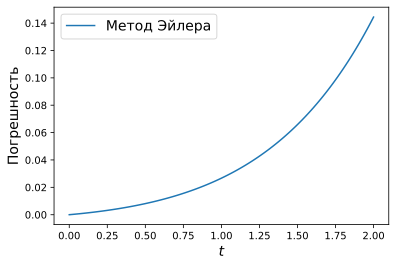

In [7]:
#Погрешность вычислений:
err_euler = y_exact(t) - y_euler

plt.plot(t, err_euler, label='Метод Эйлера')

plt.legend(loc='upper left', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('Погрешность', fontsize=14);

## Численное решение методом средней точки

В отличие от метода Эйлера, в _методе средней точки)_ (midpoint) производная вычисляется не в начальной точке интервала, а в его середине, т.е. в точке $t_n + h/2$. Полученная с помощью этой производной касательная используется для приближения следующего значения функции.
![Метод средней точки](http://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Midpoint_method_illustration.png/536px-Midpoint_method_illustration.png)

Рекуррентная формула для метода средней точки: $$y_{n+1} = y_n + h f\left(t_n + \frac{h}{2}, y\left(t_n + \frac{h}{2}\right) \right)$$

Поскольку значение функции $y(t_n + h/2) $ неизвестно, то его необходимо вычислить методом Эйлера:
$$ y\left(t_n + \frac{h}{2}\right) = y_n + \frac{h}{2} f(t_n, y_n)$$

После подстановки в рекуррентную формулу, получим:
 $$y_{n+1} = y_n + h f\left(t_n + \frac{h}{2},  y_n + \frac{h}{2} f(t_n, y_n) \right)$$


In [8]:
# Метод средней точки

y_mp = np.zeros(N+1)
y_mp[0] = y0
#шаг и предел интегрирования - прежние

for i in range(N):
    y_mp[i+1] = y_mp[i] + h * (y_mp[i] + h/2 * y_mp[i])


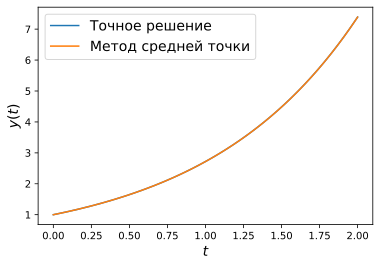

In [9]:
# Графическое сравнение результатов
plt.plot(tnew, y_exact(tnew), label='Точное решение')
plt.plot(t, y_mp, label='Метод средней точки')

plt.legend(loc='upper left', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14);

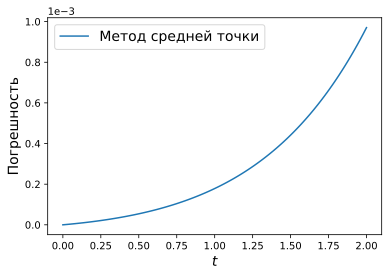

In [10]:
#Погрешность вычислений:
err_mp = y_exact(t) - y_mp

plt.plot(t, err_mp, label='Метод средней точки')

plt.legend(loc='upper left', fontsize=14)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.xlabel('$t$', fontsize=14)
plt.ylabel('Погрешность', fontsize=14);

Метод средней точки требует большего объема вычислений (значение функции $f(t)$ вычисляется дважды), но обеспечивает большую точность. Ошибка имеет порядок $O(h^3)$

## Численное решение с помощью функций пакета SciPy

Для поиска решений дифференциальных уравнений и систем можно использовать функции пакета SciPy (см. [справку](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) и [пример](http://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/integrate.html))

In [11]:
from scipy.integrate import odeint #функция для решения дифференциальных уравнений и систем
from scipy import interpolate #функция для интерполяции решения на сетке

In [12]:
#Решение уравнения

def f(y, t): #правая часть уравнения
    return y

y_scipy = odeint(f, y0, t)

In [13]:
#При решении уравнения получается матрица Nx1
print('Размерность y_scipy: ', y_scipy.shape)
print('Размерность y_mp: ', y_mp.shape)

Размерность y_scipy:  (101, 1)
Размерность y_mp:  (101,)


In [14]:
#Для дальнейших вычислений необходимо преобразовать решение в одномерный массив:

y_scipy = np.ravel(y_scipy)

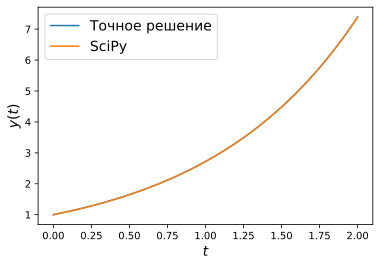

In [15]:
# Графическое сравнение результатов
plt.plot(tnew, y_exact(tnew), label='Точное решение')
plt.plot(t, y_scipy, label='SciPy')

plt.legend(loc='upper left', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14);

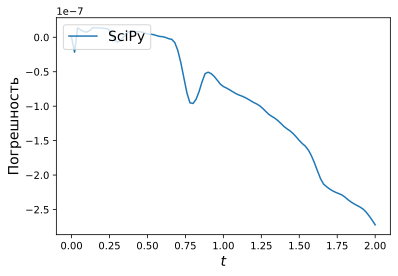

In [16]:
#Погрешность вычислений:
err_scipy = y_exact(t) - y_scipy

plt.plot(t, err_scipy, label='SciPy')

plt.legend(loc='upper left', fontsize=14)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('Погрешность', fontsize=14);

## Интерполяция решения

В результате численного решения ОДУ получается массив значений функции на дискретной сетке. Для дальнейшей обработки необходимо с помощью интерполяции преобразовать эти дискретные значения в гладкую кривую, определенную на интервале $\left[ 0, t_k \right]$

[Примеры интерполяции данных](http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)


In [17]:
# Используется сплайновая интерполяция
y = interpolate.InterpolatedUnivariateSpline(t,y_scipy) #функция определена на интервале [0, tk]

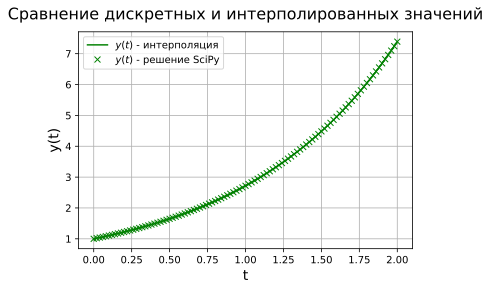

In [18]:
# Сравнение дискретных и интерполированных значений вероятностей
plt.plot(tnew,y(tnew),'g-', label=r'$y(t)$ - интерполяция') #интерполированные значения
plt.plot(t,y_scipy, 'gx', label=r'$y(t)$ - решение SciPy') #дискретные значения на сетке
plt.legend(loc='upper left') #легенда
plt.grid()
#ylim([0,1])
#xlim([0,500])

plt.xlabel('t', size=14) #подписи для осей и графика
plt.ylabel(r'y(t)', size=14)

plt.title(u'Сравнение дискретных и интерполированных значений', size=16, y=1.03);